In [145]:
import numpy
import math

import random
import time
import matplotlib.pyplot as plt

In [180]:
environment = numpy.zeros((10, 10))
trans_prob = 0.7
environment[9, 9] = 10
#environment[2, 3] = -5

In [147]:
alpha = 0.1
gamma = 0.9

In [148]:
def get_legal_actions(pos):
    legal_actions = list()
    new_pos = list()
    all_actions = [[1, 0], [0, 1], [-1, 0], [0, -1]]
    for i in all_actions:
        try:
            new_pos = numpy.add(pos, numpy.array(i))
            legal_actions.append(i)
            env = environment[new_pos[0]][new_pos[1]]
            if any(j < 0 for j in new_pos):
                legal_actions.pop()
        except IndexError:
            legal_actions.pop()
            
        
    return legal_actions

In [149]:
def take_action(pos, action):
    # Take action in the actual environment and return a reward and new position based on environment dynamics
    if numpy.random.rand(1) < trans_prob:
        new_pos = numpy.add(pos, action)
    else:
        new_pos = numpy.add(pos, random.choice(get_legal_actions(pos)))
    reward = environment[new_pos[0]][new_pos[1]]
    return new_pos, reward

In [169]:
mb_internal_environment = numpy.zeros((10, 10))


In [151]:
def mb_internal_environment_value(pos):
    value = mb_internal_environment[pos[0], pos[1]]
    return value

In [152]:
def update_mb_internal_environment(pos, next_pos, reward):
    next_value_list = list()
    for i in get_legal_actions(next_pos):
        next_value_list.append(mb_internal_environment[next_pos[0]][next_pos[1]])
    next_value = max(next_value_list)
    mb_internal_environment[pos[0], pos[1]] = (1-alpha) * mb_internal_environment_value(pos) + (alpha) * (reward + gamma*next_value)
    


In [153]:
def dls(pos, curr_depth, max_depth):
    value_list = list()
    if curr_depth == max_depth:
        return mb_internal_environment_value(pos)
    else:
        actions = get_legal_actions(pos)
        for i in actions:
            next_pos = numpy.add(numpy.array(pos), numpy.array(i))
            value = mb_internal_environment_value(pos) + gamma * dls(next_pos, curr_depth+1, max_depth)
            value_list.append(value)
        if value_list:
            average_value = numpy.mean(numpy.array(value_list))
    return average_value

In [154]:
def dls_action(pos, max_depth):
    # Do depth Limited Search till max_depth on the mb_internal_environment
    actions = get_legal_actions(pos)
    next_value_list = list()
    next_pos_list = list()
    for i in actions:
        next_pos = numpy.add(numpy.array(pos), numpy.array(i))
        next_value_list.append(dls(next_pos, 0, max_depth))
        next_pos_list.append(next_pos)
    action = actions[numpy.argmax(next_value_list)]
    return action

In [155]:
def q_action(pos):
    # Look for q values in mf_internal_environment for given position
    actions = get_legal_actions(pos)
    next_value_list = list()
    next_pos_list = list()
    for i in actions:
        next_pos = numpy.add(numpy.array(pos), numpy.array(i))
        next_value_list.append(mb_internal_environment[next_pos[0], next_pos[1]])
        next_pos_list.append(next_pos)
    action = actions[numpy.argmax(next_value_list)]
    return action

In [156]:
def dual(num_iters):
    sum_reward = 0
    max_depth = 4
    steps_per_reward = 0
    steps = list()
    j=0
    for i in range(num_iters):
        pos = [0, 0]
        j += 1

        while True:
            if j%(i+1) == 0:
                action = dls_action(pos, max_depth)
                next_pos, reward = take_action(pos, action)
                update_mb_internal_environment(pos, next_pos, reward)
                pos = next_pos
            else:
                action = q_action(pos)
                next_pos, reward = take_action(pos, action)
                update_mb_internal_environment(pos, next_pos, reward)
                pos = next_pos
            sum_reward = 0.5*sum_reward + 0.5*reward
            steps_per_reward += 1
            if reward != 0:
                mb_internal_environment[pos[0], pos[1]] = (1-alpha) * mb_internal_environment_value(pos) + (alpha) * (reward)
                steps.append(steps_per_reward)
                steps_per_reward = 0
                break
    return sum_reward, steps

In [157]:
def mb(num_iters):
    sum_reward = 0
    max_depth = 4
    steps = list()
    for i in range(num_iters):
        pos = [0, 0]
        steps_per_reward = 0
        #print (mb_internal_environment)    
     
        while True:
            action = dls_action(pos, max_depth)
            next_pos, reward = take_action(pos, action)
            update_mb_internal_environment(pos, next_pos, reward)
            pos = next_pos
            sum_reward = 0.5*sum_reward + 0.5*reward
            steps_per_reward += 1
            if reward != 0:
                mb_internal_environment[pos[0], pos[1]] = (1-alpha) * mb_internal_environment_value(pos) + (alpha) * (reward)                
                steps.append(steps_per_reward)
                steps_per_reward = 0
                break

    return sum_reward, steps

In [178]:
def mf(num_iters):
    sum_reward = 0
    max_depth = 4
    steps = list()
    for i in range(num_iters):
        pos = [0, 0]
        steps_per_reward = 0        
        #print (mb_internal_environment)
        
        while True:
            action = q_action(pos)
            next_pos, reward = take_action(pos, action)
            update_mb_internal_environment(pos, next_pos, reward)
            #print (mb_internal_environment)
            pos = next_pos
            sum_reward = 0.5*sum_reward + 0.5*reward
            steps_per_reward += 1
            if reward != 0:
                mb_internal_environment[pos[0], pos[1]] = (1-alpha) * mb_internal_environment_value(pos) + (alpha) * (reward)
                print mb_internal_environment
                steps.append(steps_per_reward)
                print steps
                steps_per_reward = 0
                break
            
    return sum_reward, steps

In [181]:
mb_internal_environment = numpy.zeros((10, 10))


Run the Dual Process on grid world. Get a list of individual time taken for each and rewards obtained.

In [182]:
times_dual = list()
reward_dual = list()
steps_dual = list()
for i in range(1):
    mb_internal_environment = numpy.zeros((10, 10))
    start_time = time.time()
    dual_result = dual(15)
    reward_dual.append(dual_result[0])
    steps_dual.append(dual_result[1])
    times_dual.append(time.time() - start_time)


In [183]:
times_mb = list()
reward_mb = list()
steps_mb = list()
for i in range(1):
    mb_internal_environment = numpy.zeros((10, 10))
    start_time = time.time()
    mb_result = mb(15)
    reward_mb.append(mb_result[0])
    steps_mb.append(mb_result[1])
    times_mb.append(time.time() - start_time)


In [184]:
times_mf = list()
reward_mf = list()
steps_mf = list()
for i in range(1):
    mb_internal_environment = numpy.zeros((10, 10))
    start_time = time.time()
    mf_result = mf(15)
    reward_mf.append(mf_result[0])
    steps_mf.append(mf_result[1])
    times_mf.append(time.time() - start_time)


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]]
[26]
[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0

[ 26.  30.  26.  28.  18.  28.  20.  30.  24.  22.  32.  22.  24.  26.  36.]
[ 24.  30.  32.  18.  26.  20.  26.  18.  28.  28.  30.  22.  22.  28.  20.]
[ 38.  24.  22.  22.  30.  28.  22.  28.  26.  28.  20.  28.  32.  22.  26.]


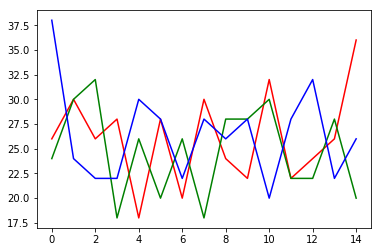

In [186]:
#print (sum(steps_mf)/300)
#print (sum(steps_mb)/300)
#print (sum(steps_dual)/300)
print (numpy.mean(numpy.array(steps_mf), axis=0))
print (numpy.mean(numpy.array(steps_dual), axis=0))
print (numpy.mean(numpy.array(steps_mb), axis=0))

stepsmf_plot, = plt.plot(numpy.arange(0, 15), numpy.mean(numpy.array(steps_mf), axis=0), color = 'r')
stepsdual_plot, = plt.plot(numpy.arange(0, 15), numpy.mean(numpy.array(steps_dual), axis=0), color = 'g')
stepsmb_plot, = plt.plot(numpy.arange(0, 15), numpy.mean(numpy.array(steps_mb), axis=0), color = 'b')

#plt.xticks(numpy.arange(3), ('mb', 'dual', 'mf'))
plt.show()

In [187]:
reward_mean_dual = numpy.mean(numpy.array(reward_dual))
reward_mean_mb = numpy.mean(numpy.array(reward_mb))
reward_mean_mf = numpy.mean(numpy.array(reward_mf))
times_mean_dual = numpy.mean(numpy.array(times_dual))
times_mean_mb = numpy.mean(numpy.array(times_mb))
times_mean_mf = numpy.mean(numpy.array(times_mf))
steps_mean_dual = sum(steps_dual[0])
steps_mean_mb = sum(steps_mb[0])
steps_mean_mf = sum(steps_mf[0])


In [188]:
print steps_mf

[[26, 30, 26, 28, 18, 28, 20, 30, 24, 22, 32, 22, 24, 26, 36]]


In [189]:
rewards = numpy.array([reward_mean_mb, reward_mean_dual, reward_mean_mf])
#yerror = numpy.array(reward_errors)
print (rewards)

[ 5.00000007  5.00000477  5.        ]


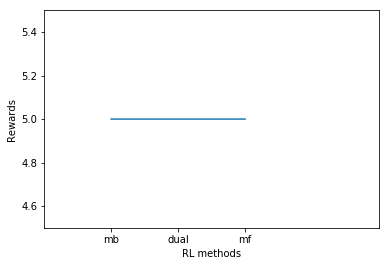

In [190]:
reward_plot, = plt.plot(numpy.arange(0, 3), rewards)
plt.xticks(numpy.arange(3), ('mb', 'dual', 'mf'))
plt.xlim(xmin = -1, xmax = 4)
plt.ylim(ymin = 4.5, ymax = 5.5)
plt.xlabel('RL methods')
plt.ylabel("Rewards")

plt.show()

[ 8.76582503  7.31821012  0.14734006]


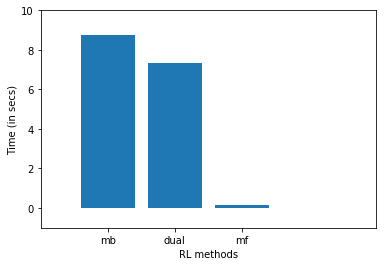

In [191]:
times = numpy.array([times_mean_mb, times_mean_dual, times_mean_mf])
print (times)
plt.bar(numpy.arange(3), times, align='center')
plt.xticks(numpy.arange(3), ('mb', 'dual', 'mf'))
plt.xlim(xmin = -1, xmax = 4)
plt.ylim(ymin = -1, ymax = 10)
plt.xlabel('RL methods')
plt.ylabel("Time (in secs)")

plt.show()

[396 372 392]


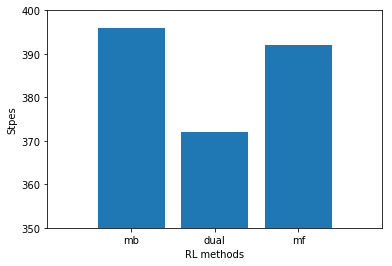

In [192]:
steps = numpy.array([steps_mean_mb, steps_mean_dual, steps_mean_mf])
print (steps)
plt.bar(numpy.arange(3), steps, align='center')
plt.xticks(numpy.arange(3), ('mb', 'dual', 'mf'))
plt.xlim(xmin = -1, xmax = 3)
plt.ylim(ymin = 350, ymax = 400)
plt.xlabel('RL methods')
plt.ylabel("Stpes")

plt.show()